# Draft analysis 

---

Group name: Doreen Mack, David Riethmann

---


# 1 Introduction

### 1.1 Introduction and Motivation

For our project we have chosen a dataset about the release and establishment of the weevil Mecinus janthiniformis for biological control of Dalmatian toadflax in southern California. 

Dalmatian toadflax was introduced to North America in the 1800s, presumably as ornamental plants and for use in fabrics and folk remedies. The species is now widespread in large parts of the USA and Canada. Due to its extensive root system and prolific seed production, it can thrive and spread rapidly in a variety of ecosystems, including grasslands and roadsides. A lack of natural enemies is seen as one reason why plant species become invasive pests when they are introduced into areas outside their original range.

Invasive plants such as Dalmatian toadflax can cause ecological problems. On the one hand, it can displace native plants and as a result reduce biodiversity. It can also have an impact on the availability of habitat for native animals as the dominance of Dalmatian toadflax can disrupt the structure and function of ecosystems. On the other hand, we have to think about the soil composition. Invasive plants can alter the soil by removing nutrients, which can have an impact on the native vegetation. Moreover, Dalmatian toadflax can tend to accumulate dry material, which can increase fire hazard.

Therefore, attempts are being made to control the spread of Dalmatian toadflax. During the 1950s-1960s studies with herbicides have been conducted. Because of the variable responses, different herbicides have been recommended e.g. borate-chlorate mixtures, different acids or silvex. However, the studies concluded that chemical control alone is not practical for large infestations and emphasized the need for integrated control strategies that take into account both chemical and ecological factors. Other studies have investigated the effect of prescribed fires and the use of adapted grasses in competition with toadflax. However, these studies also came to the conclusion that neither fire nor competing grasses reduce toadflax populations.

Nowadays, biological control using herbivorous insects such as Mecinus janthiniformis is the most promising method of controlling invasive weeds in a long-term, cost-effective and sustainable way.
These insects can infest plants, seeds, roots, leaves and stems. Continuous effect and permanent control, as well as the good combination with other control methods and the self-spreading, but also long-term and environmentally friendly nature are just some of the advantages that should be mentioned.
However, studies and tests on the success of these natural control agents are very cost-intensive and time-consuming.
Nevertheless, the advantages outweigh the disadvantages, which is why the use of herbivorous insects to control invasive plants is widespread today.

In our case, weevil Mecinus janthiniformis populations were released in the investigated area of southern California.
We aim to find patterns and trends within the dataset and define factors and potential predictors associated with the growth of Dalmatian toadflax and the spread of weevil populations.

**References**

Jacobs, J. S., & Sheley, R. L. (2003). Prescribed fire effects on dalmation toadflax. Rangeland Ecology & Management/Journal of Range Management Archives, 56(2), 193-197.: https://journals.uair.arizona.edu/index.php/jrm/article/download/9791/9403

Robocker, W. C. (1968). Control of Dalmation Toadflax. Rangeland Ecology & Management/Journal of Range Management Archives, 21(2), 94-98.: https://journals.uair.arizona.edu/index.php/jrm/article/viewFile/5580/5190

Sing, S. E., De Clerck-Floate, R. A., Hansen, R. W., Pearce, H., Randall, C. B., Toševski, I., & Ward, S. M. (2016). Biology and biological control of Dalmatian and yellow toadflax (p. 141). Morgantown, West Virginia: USDA Forest Service, Forest Health Technology Enterprise Team.: https://www.fs.usda.gov/rm/pubs_journals/2016/rmrs_2016_sing_s001.pdf

Willden, S. A., & Evans, E. W. (2019). Summer development and survivorship of the weed biocontrol agent, Mecinus janthiniformis (Coleoptera: Curculionidae), within stems of its host, Dalmatian toadflax (Lamiales: Plantaginaceae), in Utah. Environmental entomology, 48(3), 533-539.

### 1.2 Research Questions and Hypothesis

**Linear Regression:**

We want to identify patterns and trends within our dataset and define factors or potential predictors associated with the growth of Dalmatian toadflax. Our model aims to predict the main stem length of Dalmatian toadflax based on different traits.

**Logistic Regression:**

For the logistic regression we want to predict, if a plant is infested by weevil populations or not. Therefore, we use different predictor variables and try to identify which characteristics of a plant are most likely to indicate a possible infestation.

Our **hypothesis** is that the spread of weevil populations contributes to the reduction of Dalmatian toadflax vegetation in the area and reduces the size of the plants. 

If it turns out that weevil cultivation does indeed influence the containment of the spread, this could serve as a basis for the decision to increase the use of herbivorous insects such as Mecinus janthiniformis to control the growth of Dalmatian toadflax.

### 1.3 Data Origin

The dataset was originally collected by Lincoln Smith starting in 2008 and published by the Agricultural Research Service (Department of Agriculture). 

Every year an observational study was conducted on six different sites within the investigated area with approximately 7-78 observations per site and year. The plants were collected, examined, measured and dissected in the labratory. Each observation in the datasets represents a plant in the investigated area.

Link to the data source: https://catalog.data.gov/dataset/data-from-release-and-establishment-of-the-weevil-mecinus-janthiniformis-for-biological-co

## 2 Setup

We start by importing the required libraries and modules.
These are:
- Pandas: A library for data analysis which provides data structures such as series and DataFrames that form the basis for working with data.
- Altair: A library for statistical visualization that provides a variety of graphics.
- Scikit-Learn: A machine learning library which provides tools for data analysis and modelling. From Scikit-Learn we have imported a bunch of modules e.g. to calculate statistical measures or split the dataset.

In [1]:
import pickle
import pandas as pd
import altair as alt

from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import RandomOverSampler

## 3 Data

### 3.1 Import Data

Next we are using pandas to read the data form our CSV file and create a DataFrame which we call "df" and which will contain the data from the CSV file in tabular format. 

We also create a DataFrame "meta" which will contain our data dictionary. The data dictionary provides additional information about the columns and variables in "df". To read the data from our excel file we also use the pandas function.

In [2]:
df = pd.read_csv('../data/raw/dissections_2012_HV.csv')
meta = pd.read_excel('../data/raw/metadata_dictionary.xlsx')

### 3.2 Data Structure

Let´s first take a look at the metadata. We want to get a brief overview of the data in our "df".
We can see there are 25 variables. The description, role, type and format of each variable in our DataFrame can be taken from the following table:

In [3]:
meta

,Name,Description,Role,Type,Format
0,year,year that stems were infested,-,numeric,int64
1,diss date,date dissected in the laboratory,-,numeric,object
2,date,date collected in the field,-,numeric,object
3,site,six study sites at Hungry Valley study area,Predictor,nominal,object
4,trt,release or not in 2008 and 2014,-,nominal,object
5,BC,"1 = early establishment, 0 = late establishment",-,nominal,int64
6,stem #,stem ID,ID,numeric,int64
7,stem diam bottom (mm),diameter of stem at bottom,Predictor,numeric,float64
8,main stem length (cm),"length of stem, excluding side branches","Predictor, response",numeric,float64
9,total meja,"sum of no. empty chambers, dead larvae, dead p...",Predictor,numeric,int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    1066 non-null   int64  
 1   diss date               1066 non-null   object 
 2   Date                    1066 non-null   object 
 3   site                    1066 non-null   object 
 4   trt                     1066 non-null   object 
 5   BC                      1066 non-null   int64  
 6   stem #                  1066 non-null   int64  
 7   stem diam bottom (mm)   1066 non-null   float64
 8    main stem length (cm)  1066 non-null   float64
 9   Total Meja              1066 non-null   int64  
 10  Meja/100 cm             1066 non-null   float64
 11  infested                1066 non-null   int64  
 12  diam top (mm)           370 non-null    float64
 13  Tip of Stem broken      500 non-null    object 
 14  side branches (cm)      84 non-null     

In [5]:
df.head().T

,0,1,2,3,4
year,2012,2012,2012,2012,2012
diss date,12/7/12,12/8/12,12/10/12,12/10/12,12/10/12
Date,12/3/12,12/3/12,12/3/12,12/3/12,12/3/12
site,West,West,West,West,West
trt,Release,Release,Release,Release,Release
BC,1,1,1,1,1
stem #,1,2,3,4,5
stem diam bottom (mm),7.8,8.2,6.6,6.4,6.5
main stem length (cm),64.0,57.5,33.0,59.0,45.0
Total Meja,21,46,32,30,31


In [6]:
df.tail().T

,1061,1062,1063,1064,1065
year,2018,2018,2018,2018,2018
diss date,8/23/19,8/23/19,8/23/19,8/23/19,8/23/19
Date,5/9/19,5/9/19,5/9/19,5/9/19,5/9/19
site,USFS-North,USFS-North,USFS-North,USFS-North,USFS-North
trt,Check,Check,Check,Check,Check
BC,1,1,1,1,1
stem #,16,17,18,19,20
stem diam bottom (mm),4.5,5.3,6.8,6.9,7.1
main stem length (cm),46.0,51.0,109.0,104.0,96.0
Total Meja,8,1,4,1,2


We use the describe function to compute summary statistics for all numerical columns in our DataFrame. It includes the count, mean, standard deviation, minimum, 25th percentile (Q1), 50th percentile (median), 75th percentile (Q3), and maximum. 
To switch rows and columns the transpose operation is used.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1066.0,2014.288931,2.034678,2012.0,2012.000,2014.00,2016.000,2018.0
BC,1066.0,0.487805,0.500086,0.0,0.000,0.00,1.000,1.0
stem #,1066.0,25.863039,29.670016,1.0,8.000,15.00,32.000,141.0
stem diam bottom (mm),1066.0,4.963227,1.832666,1.1,3.700,4.90,6.200,12.2
main stem length (cm),1066.0,51.277674,24.923005,2.0,34.000,49.00,67.000,135.0
Total Meja,1066.0,5.273921,9.163923,0.0,0.000,0.00,8.000,67.0
Meja/100 cm,1066.0,11.513602,20.270924,0.0,0.000,0.00,15.550,133.3
infested,1066.0,0.454034,0.498116,0.0,0.000,0.00,1.000,1.0
diam top (mm),370.0,1.781081,1.224510,0.2,0.900,1.50,2.300,7.6
side branches (cm),84.0,60.226190,47.528647,8.0,29.500,45.50,76.750,250.0


### 3.3 Data Corrections

Data corrections must be carried out as a basis for data analysis. We start by taking a look at the columns designations:

In [8]:
df.columns

Index(['year', 'diss date', 'Date', 'site', 'trt', 'BC', 'stem #',
       'stem diam bottom (mm)', ' main stem length (cm)', 'Total Meja',
       'Meja/100 cm', 'infested', 'diam top (mm)', 'Tip of Stem broken',
       'side branches (cm)', 'No. empty chambers', 'total chamber length',
       'live adults', 'dead adults', 'dead larvae', 'dead pupae', 'parasitoid',
       'live pupa', 'live larva', 'Total No. adults'],
      dtype='object')

We quickly see that the column names have some peculiarities that can lead to problems for example upper and lower case, special characters. Therefore we want to standardize column names and make them more consistent by using regular expressions.

We start by using str.lower in order to convert all characters in string to lowercase.

In [9]:
df.columns = df.columns.str.lower()

For the column "stem #" we want to replace # by ID.

In [10]:
df.columns = df.columns.str.replace(r"\#", r"id", regex=True)

Next we are removing leading and trailing whitespaces from each column name.

In [11]:
df.columns = df.columns.str.replace(r"^\s+|\s+$", r"", regex=True)

Moreover we are replacing all spaces in each column name with underscores.

In [12]:
df.columns = df.columns.str.replace(r"\s", r"_", regex=True)

In the beginning we saw that many special characters are being used and units are given in brackets. With the next codeline we are replacing all opening brackets in each column name with "in_".

In [13]:
df.columns = df.columns.str.replace(r"\(", r"in_", regex=True)

After that we are removing all closing brackets in each column name.

In [14]:
df.columns = df.columns.str.replace(r"\)", r"", regex=True)

Moreover we have to remove all periods and replace all forward slashes in each column name with "per".

In [15]:
df.columns = df.columns.str.replace(r"\/", r"_per_", regex=True)

In [16]:
df.columns = df.columns.str.replace(r"\.", r"", regex=True)

In the next codelines we are replacing no by number and year by year_infested.

In [17]:
df.columns = df.columns.str.replace(r"no", r"number", regex=True)

In [18]:
df.rename(columns={'year': 'year_infested'}, inplace=True)

Then we are converting the values in the two diameter columns from millimeters to centimeters and round to two decimal places. New columns are crated for the diameter columns in centimeters.

In [19]:
df['stem_diam_bottom_in_cm'] = df.loc[:, 'stem_diam_bottom_in_mm'] / 10

In [20]:
df[['stem_diam_bottom_in_cm']] = df[['stem_diam_bottom_in_cm']].round(2)

In [21]:
df['diam_top_in_cm'] = df.loc[:, 'diam_top_in_mm'] / 10

In [22]:
df[['diam_top_in_cm']] = df[['diam_top_in_cm']].round(2)

As some columns contain no data or data that is not relevant for further analysis, we omit the corresponding columns.

In [23]:
df = df.drop(columns=['bc', 'trt', 'live_adults', 'dead_adults', 'dead_larvae', 'dead_pupae', 'parasitoid', 'live_pupa', 'live_larva', 'total_chamber_length', 'year_infested', 'diss_date', 'date', 'site', 'stem_id', 'stem_diam_bottom_in_mm', 'meja_per_100_cm','diam_top_in_mm', 'number_empty_chambers'])

In the "tip_of_stem_broken" column, c stands for cut and b for broken. If neither c nor b is given, we assume that the tip of the stem is intact. An intact tip leads to a greater length of the main stem, and we want to use the data as a categorical predictor. Therefore, a broken or cut stem tip is assigned the value 1 and an intact stem tip is assigned the value 0. We are using a loop to iterate over the values in the 'tip_of_stem_broken' column. For each value, it checks if the value is equal to 'b' or 'c'. If the condition is true, it assigns the value 1 to the corresponding cell in the 'tip_of_stem_broken' column, otherwise, it assigns the value 0.

In [24]:
for v in range(len(df['tip_of_stem_broken'])):
    if df.loc[v, 'tip_of_stem_broken'] == 'b' or df.at[v, 'tip_of_stem_broken'] == 'c':
        df.loc[v, 'tip_of_stem_broken'] = 1
    else:
        df.loc[v, 'tip_of_stem_broken'] = 0

Afterwards we converte the values in the column to integer type.

In [25]:
df['tip_of_stem_broken'] = df['tip_of_stem_broken'].astype('int64')

Moreover a few other convertions have to be made.
The values in column "site" are converted to category type and the values in columns "date" and "diss_date" are converted to datetime objects but we only extract the date component.

In [26]:
#df['site'] = df['site'].astype('category')

In [27]:
#df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')
#df['date'] = df['date'].dt.date

In [28]:
#df['diss_date'] = pd.to_datetime(df['diss_date'], format='%m/%d/%y')
#df['diss_date'] = df['diss_date'].dt.date

This is the final result of the columns names:

In [29]:
df.columns

Index(['main_stem_length_in_cm', 'total_meja', 'infested',
       'tip_of_stem_broken', 'side_branches_in_cm', 'total_number_adults',
       'stem_diam_bottom_in_cm', 'diam_top_in_cm'],
      dtype='object')

Finally we save the corrected DataFrame as CSV file.

In [30]:
df.to_csv('../data/interim/dissections_2012_HV_corrected.csv')

### 3.4 Variable Lists

To get an overview of the variables we now have in our corrected DataFrame, we call df.info(). This method provides a summary of the DataFrame, including information about its structure, e.g. the number of entries and the number of non-null values per column, as well as its data types.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   main_stem_length_in_cm  1066 non-null   float64
 1   total_meja              1066 non-null   int64  
 2   infested                1066 non-null   int64  
 3   tip_of_stem_broken      1066 non-null   int64  
 4   side_branches_in_cm     84 non-null     float64
 5   total_number_adults     1066 non-null   int64  
 6   stem_diam_bottom_in_cm  1066 non-null   float64
 7   diam_top_in_cm          370 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 66.8 KB


#### 3.4.1 Linear Regression

Now we need to prepare our linear regression analysis. As y_label_lin we define the main stem length in cm, as this is the dependent variable we want to predict. Next, we define our possible predictor variables in a list called features:

- stem_diam_bottom_in_cm
- total_meja
- meja_per_100_cm
- diam_top_in_cm
- side_branches_in_cm
- tip_of_stem_broken
- infested
- total_number_adults'

We want to use these variables to predict the main stem length of the plants and therefore define them as X.
Y is assigned a series containing the values from the column main stem length that is defined by the y_label_lin variable.

In [32]:
y_label_lin = 'main_stem_length_in_cm'

features_lin = ['stem_diam_bottom_in_cm', 'diam_top_in_cm', 'side_branches_in_cm', 'meja_per_100_cm', 'total_meja', 'tip_of_stem_broken', 'infested', 'total_number_adults']

As the varaibles 'meja_per_100_cm' and 'total meja' show multicolinearity (see chapter 4.2.1), we decided to remove 'meja_per_100_cm' from the features list.

In [33]:
features_lin.remove('meja_per_100_cm')

#### 3.4.2 Logistic Regression

For the logistic regression analysis, we want to predict whether a plant is infested or not in order to analyze whether plants infested by weevils are more likely to remain smaller and if weevils are really useful and effective as natural control agents.
Possible predictor variables are again defined in a features list:

- main_stem_length_cm
- stem_diam_bottom_cm
- side_branches_cm
- diam_top_cm
- tip_of_stem_broken

We want to use these variables to predict infestation and therefore define them as X. As we want to predict whether a plant is infested or not we cannot use features that directly indicate infestation e.g. 'total_meja', 'total_number_adults', 'meja_per_100_cm'. Therefore, we use all remaining features that are not directly indicating infestation.

In [34]:
y_label_log = 'infested'

features_log = ['main_stem_length_in_cm', 'stem_diam_bottom_in_cm', 'side_branches_in_cm', 'diam_top_in_cm', 'tip_of_stem_broken']

### 3.5 Data Splitting and Imputation

Using df.info() method in chapter 3.4, we quickly recognized that columns diam_top_in_cm and side_branches_in_cm only contain fewer values.

In [35]:
notna = pd.DataFrame(df.notna().sum()).rename(columns={0: "count"})
notna[["%"]] = round(notna[["count"]] / len(df) * 100,1)
notna

,count,%
main_stem_length_in_cm,1066,100.0
total_meja,1066,100.0
infested,1066,100.0
tip_of_stem_broken,1066,100.0
side_branches_in_cm,84,7.9
total_number_adults,1066,100.0
stem_diam_bottom_in_cm,1066,100.0
diam_top_in_cm,370,34.7


In [36]:
alt.Chart(notna.reset_index()).mark_bar().encode(
    x="count",
    y="index",
).properties(height=500)

alt.Chart(...)

We therefore can consider filling in the missing values using SimpleImputer class from Scikit-Learn.
There are three possible options now to proceed:

**Option 1: method = "reduced"**
With option 1, we omit all rows with NaN values and use a reduced DataFrame.

**Option 2: method = "imputed_mean"**
Option 2 uses imputation to fill in the missing values in the two specified columns. As strategy we specify mean so the missing values are replaced with the mean of each column.

**Option 3: method = "imputed_median"**
With option 3, the missing values in the two specified columns are also filled in by imputation. As a strategy, we specify the median so that the missing values are replaced by the median of each column.

In [37]:
methods = ["reduced", "imputed_mean", "imputed_median"] 

First, we define some functions.
The reduction function takes our DataFrame as an argument and performs some operations on a copy of our df. The column "side_branches_in_cm" is omitted, as are all rows containing NaN values. The function then returns the reduced DataFrame.

In [38]:
def reduction(df: pd.DataFrame, model: str, variables_to_reduce: list) -> pd.DataFrame:
    """
    Reduce a DataFrame by removing specified variables and dropping rows with missing values.

    Parameters:
    - df (pd.DataFrame): The input DataFrame to be reduced.
    - variables_to_reduce (list): A list of variable names to be removed from the DataFrame.

    Returns:
    - pd.DataFrame: A new DataFrame with the specified variables removed and rows with missing values dropped.
    """
    
    # Create a copy of the input DataFrame to avoid modifying the original data
    df_reduced = df.copy()
    
    # Iterate through the list of variables to reduce
    for v in variables_to_reduce:
        # Drop the specified variable from the DataFrame
        df_reduced = df_reduced.drop(v, axis=1)

         # Drop rows with missing values in the DataFrame
        df_reduced = df_reduced.dropna()

        # Check if the variable is in the lists features_lin or features_log and remove it if found
        if v in features_lin and model == 'linear_reg':
            features_lin.remove(v)
        if v in features_log and model == 'logistic_reg':
            features_log.remove(v)

    return df_reduced


The imputation function performs imputation on specified columns of our DataFrame "diam_top_in_cm" and "side_branches_in_cm" using scikit-learn's SimpleImputer. The strategy parameter is expected to be a string, in our case "mean" or "median". The function returns the DataFrame with the imputed values.

In [39]:
def imputation(df: pd.DataFrame, strategy: str, variables_to_impute: list) -> pd.DataFrame:
    """
    Impute missing values in specified variables of a DataFrame using a specified imputation strategy.

    Parameters:
    - df (pd.DataFrame): The input DataFrame to be imputed.
    - strategy (str): The imputation strategy to be used, e.g., 'mean', 'median', 'most_frequent', or 'constant'.
    - variables_to_impute (list): A list of variable names to be imputed.

    Returns:
    - pd.DataFrame: A new DataFrame with missing values imputed using the specified strategy in the specified variables.
    """
    
    # Create a SimpleImputer with the specified strategy
    imputer = SimpleImputer(strategy=strategy)
    
    # Create a copy of the input DataFrame to avoid modifying the original data
    df_imputed = df.copy()

    # Iterate through the list of variables to impute
    for v in variables_to_impute:
        # Impute missing values in the specified variable
        df_imputed[v] = imputer.fit_transform(df_imputed[[v]])

        # Check if the variable's data type is float and round to 2 decimal places if it is
        if df_imputed[v].dtype == 'float64':
            df_imputed[[v]] = df_imputed[[v]].round(2)

    return df_imputed

The function set_variables prepares the input DataFrame for our linear and logistic regression models. The features that we previously specified in our features_lin and features_log lists are extracted, as are our target variables y_label_lin and y_label_log. Rows with missing values in the target variable are to be dropped for both linear and logistic regression.

In [40]:
def set_variables(df: pd.DataFrame, y_label: str, features: list) -> tuple:
    """
    Extract and set variables for modeling from a DataFrame.

    Parameters:
    - df (pd.DataFrame): The input DataFrame containing the data.

    Returns:
    - tuple: A tuple containing two variables: X, y
    """
    
    # Extract features and target variables for modeling
    X = df.dropna(subset=[y_label])[features]
    y = df.dropna(subset=[y_label])[y_label]
    
    return X, y

The list model_methods contains the respective dictionaries which are used so asign the coresponding method to the model.

In [41]:
def get_custom_df(model: str, method: str) -> pd.DataFrame:
    """
    Generate a custom DataFrame based on the specified reduction or imputation method.

    Parameters:
    - model (str): The machine learning model type.
    - method (str): The method to apply on the DataFrame ("reduced", "imputed_mean", or "imputed_median").

    Returns:
    - pd.DataFrame: The custom DataFrame.
    """
    custom_df = df.copy()
    if method == "reduced":
        custom_df = reduction(df=custom_df, model=model, variables_to_reduce=["side_branches_in_cm"])
    elif method == "imputed_mean":
        custom_df = imputation(df=custom_df, strategy="mean", variables_to_impute=["diam_top_in_cm", "side_branches_in_cm"])
    elif method == "imputed_median":
        custom_df = imputation(df=custom_df, strategy="median", variables_to_impute=["diam_top_in_cm", "side_branches_in_cm"])
    return custom_df

def set_custom_variables(model_methods: list[dict]) -> tuple:
    """
    Set custom variables based on the specified machine learning model and method.

    Parameters:
    - model_methods (list): List of dictionaries containing model and method information as well as y_label and features.

    Returns:
    - dict: A dictionary containing results for each specified model and method.
    """
    results = {}
    for model_method in model_methods:
        model = model_method['model']
        method = model_method['method']
        y_label = model_method['y_label']
        features = model_method['features']
        custom_df = get_custom_df(model=model, method=method)
        if model == "linear_reg":
            custom_X, custom_y = set_variables(df=custom_df, y_label=y_label, features=features)
            results[model] = (model, method, custom_df, custom_X, custom_y)
        elif model == "logistic_reg":
            custom_X, custom_y = set_variables(df=custom_df, y_label=y_label, features=features)
            results[model] = (model, method, custom_df, custom_X, custom_y)
    return results


model_methods = [
    {"model": "linear_reg", "method": "imputed_mean", "y_label": y_label_lin, "features": features_lin},
    {"model": "logistic_reg", "method": "reduced", "y_label": y_label_log, "features": features_log}
]

variables = set_custom_variables(model_methods)

In [42]:
variables['linear_reg'][3].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   stem_diam_bottom_in_cm  1066 non-null   float64
 1   diam_top_in_cm          1066 non-null   float64
 2   side_branches_in_cm     1066 non-null   float64
 3   total_meja              1066 non-null   int64  
 4   tip_of_stem_broken      1066 non-null   int64  
 5   infested                1066 non-null   int64  
 6   total_number_adults     1066 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 58.4 KB


In [43]:
variables['logistic_reg'][3].info()

<class 'pandas.core.frame.DataFrame'>
Index: 370 entries, 0 to 1062
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   main_stem_length_in_cm  370 non-null    float64
 1   stem_diam_bottom_in_cm  370 non-null    float64
 2   diam_top_in_cm          370 non-null    float64
 3   tip_of_stem_broken      370 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 14.5 KB


To continue, our data must be split into training and test sets. We use the train_test_split function from scikit-learn to perform the split. We define 20% of the data set to be included in the test split. The remaining 80% of the data set is therefore used as the training set.

After the splitting we create new DataFrames called df_train an df_test from the training and testing set and save it as CSV files.

In [44]:
def split_and_save(model: str, method:str, X: pd.DataFrame, y: pd.Series, ret_val: str = None, save: bool = False, state: str = "eval") -> tuple:
    """
    Split the input data into training and testing sets, optionally save the training data to a CSV file,
    and return the specified values.

    Parameters:
    - model (str): The machine learning model type.
    - method (str): The method used to generate the data.
    - X (pd.DataFrame): The feature matrix.
    - y (pd.Series): The target variable.
    - ret_val (str, optional): Specify what values to return ('data_only' or data including df_train DataFrame).
    - save (bool, optional): Whether to save the training data to a CSV file.
    - state (str, optional): Defines the state of the data.

    Returns:
    - tuple: A tuple containing the requested values based on the specified ret_val.
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.2,
        random_state=0
    )
    df_train = pd.DataFrame(X_train.copy())
    df_test = pd.DataFrame(X_test.copy())
    df_train = df_train.join(pd.DataFrame(y_train))
    df_test = df_test.join(pd.DataFrame(y_test))
    if save:
        df_train.to_csv(f'../data/processed/train_data_{model}_{method}_{state}.csv')
        df_test.to_csv(f'../data/processed/test_data_{model}_{method}_{state}.csv')

    if ret_val == 'data_only':
        return X_train, X_test, y_train, y_test
    else:
        return df_train, X_train, X_test, y_train, y_test

In the following code cells the function split_and_save is applied:

**Linear Regression:**

In [45]:
df_train_lin, X_train_lin, X_test_lin, y_train_lin, y_test_lin = split_and_save(
    model=variables['linear_reg'][0], method=variables['linear_reg'][1], X=variables['linear_reg'][3], y=variables['linear_reg'][4], save=True)

**Logistic Regression:**

In [46]:
df_train_log, X_train_log, X_test_log, y_train_log, y_test_log = split_and_save(
    model=variables['logistic_reg'][0], method=variables['logistic_reg'][1], X=variables['logistic_reg'][3], y=variables['logistic_reg'][4], save=True)

## 4 Analysis

### 4.1 Descriptive Statistics

Typical methods of descriptive data analysis are the calculation of mean values, medians and standard deviations as well as the creation of histograms, box plots or cross tables. It focuses on the organization and description of existing data without in-depth analysis or hypothesis formation.

#### 4.1.1 Linear Regression

First, we use the describe function to compute summary statistics for all numerical columns in our corrected Test-DataFrame.

In [47]:
df_train_lin.describe().T

,count,mean,std,min,25%,50%,75%,max
stem_diam_bottom_in_cm,852.0,0.494859,0.183730,0.11,0.360,0.48,0.62,1.12
diam_top_in_cm,852.0,0.178099,0.074094,0.02,0.180,0.18,0.18,0.76
side_branches_in_cm,852.0,60.165599,12.877487,8.00,60.230,60.23,60.23,222.00
total_meja,852.0,5.252347,8.949443,0.00,0.000,0.00,8.00,62.00
tip_of_stem_broken,852.0,0.456573,0.498403,0.00,0.000,0.00,1.00,1.00
infested,852.0,0.461268,0.498790,0.00,0.000,0.00,1.00,1.00
total_number_adults,852.0,2.495305,6.044001,0.00,0.000,0.00,1.00,53.00
main_stem_length_in_cm,852.0,51.234155,24.998356,2.00,33.875,49.00,67.00,135.00


Next, we create a grid of bar charts using Altair. Each column represents a different variable, either a feature or the response variable. Each row represents a histogram of the variables distribution.
This diagram is a tool for an initial, visual exploration of the data distributions in the training dataset. The histogram grids allow us to check the distribution of each variable in the training data set. We can identify patterns, outliers or characteristic shapes in the histograms that may indicate certain properties of the data.

In [48]:
alt.Chart(df_train_lin).mark_bar().encode(
    alt.X(alt.repeat("column"), type="quantitative", bin=True),
    y='count()',
).properties(
    width=150,
    height=150
).repeat(
    column=[y_label_lin] + features_lin
)

alt.RepeatChart(...)

#### 4.1.2 Logistic Regression

Again, we use the describe function to compute summary statistics for all numerical columns but we are grouping the DataFrame by the "infested" column.

In [49]:
df_train_log.groupby(by=['infested']).describe().T

infested                               0           1
main_stem_length_in_cm count   78.000000  218.000000
                       mean    70.346154   46.160550
                       std     18.183643   17.028626
                       min     36.000000    8.000000
                       25%     55.500000   34.250000
                       50%     69.000000   43.000000
                       75%     84.500000   54.000000
                       max    110.000000  124.000000
stem_diam_bottom_in_cm count   78.000000  218.000000
                       mean     0.541410    0.514404
                       std      0.196830    0.161056
                       min      0.220000    0.190000
                       25%      0.382500    0.390000
                       50%      0.505000    0.490000
                       75%      0.657500    0.617500
                       max      1.090000    1.080000
diam_top_in_cm         count   78.000000  218.000000
                       mean     0.132308    0.198028
                       std      0.122749    0.122907
                       min      0.020000    0.020000
                       25%      0.050000    0.110000
                       50%      0.090000    0.170000
                       75%      0.167500    0.260000
                       max      0.650000    0.760000
tip_of_stem_broken     count   78.000000  218.000000
                       mean     0.525641    0.706422
                       std      0.502574    0.456449
                       min      0.000000    0.000000
                       25%      0.000000    0.000000
                       50%      1.000000    1.000000
                       75%      1.000000    1.000000
                       max      1.000000    1.000000

To get more detailed information we are generating a grid of area charts using Altair, where each chart represents the distribution of quantitative variables, specified in y_label_log and features_log, in the DataFrame df_train_log. The areas are colored based on the values in the "infested" column.

In [98]:
alt.Chart(df_train_log).mark_area(
    opacity=0.5,
    interpolate='step'
).encode(
    alt.X(alt.repeat("column"), type="quantitative", bin=alt.Bin(maxbins=20)),
    alt.Y('count()', stack = None),
    alt.Color('infested:N'),
).properties(width=300).repeat(column=features_log)

alt.RepeatChart(...)

It can be seen that we have significantly less data for diameter top. Diameter top is larger for infested plants, which could indicate cut or broken tips. Therefore, we can assume that the tip of infested plants is more likely to break off or be cut off due to infestation. This fact also affects the main stem length of these plants and could be the reason for many counts in the 20-70 cm main stem length range. This could also explain why the bottom diameters of infested plants tend to be larger. The plants were larger but were cut or broken off, whereas the size of the lower diameter remains the same.

### 4.2 Exploratory Data Analysis and Relationships

EDA uses a variety of methods to discover patterns in the data. These include scatterplots, correlation analysis, clustering and other exploratory visualizations. The focus is on gaining new insights and understanding the data set.

#### 4.2.1 Linear Regression

First, we create a grid matrix of scatter plots. This matrix provides a visual overview of the relationship between different pairs of variables in the training dataset. By looking at the scatter plots, patterns such as linear relationships, clustering or outliers can be identified.
The repetition in both the rows and columns makes it possible to look at relationships between the target variable (y_label) and the other features, as well as between the features themselves.

In [51]:
alt.Chart(df_train_lin).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative')
).properties(
    width=150,
    height=150
).repeat(
    row=[y_label_lin] + features_lin,
    column=[y_label_lin] + features_lin
).interactive()

alt.RepeatChart(...)

We can see that stem diam bottom and main stem length have a positive linear relationship.

In the following code cell we calculate the correlation coefficients between the columns in the DataFrame df_train and the target variable (y_label).
The higher the correlation coefficient, the stronger the linear relationship between the two variables. A positive correlation indicates that as one variable increases, the other tends to increase, while a negative correlation indicates that as one variable increases, the other tends to decrease.

As we already recognized in the scatter plot matrix, stem diam bottom has the strongest linear relationship (0.655) with the response variable main stem length. This indicates that stem diam bottom will be a suitable predictor variable.
However, we have to keep in mind that correlation does not imply causation.

In [52]:
corr = df_train_lin.corr()
corr[y_label_lin].sort_values(ascending=False)

main_stem_length_in_cm    1.000000
stem_diam_bottom_in_cm    0.655359
infested                  0.102391
total_meja                0.031019
side_branches_in_cm      -0.054230
tip_of_stem_broken       -0.066924
diam_top_in_cm           -0.078608
total_number_adults      -0.115388
Name: main_stem_length_in_cm, dtype: float64

By applying the background gradient, we can improve the visualization of the correlation matrix. Cells with higher positive correlations are shaded with darker blue colors, while cells with higher negative correlations are shaded with lighter blue colors. 

This color gradient allows for a quick and intuitive visual assessment of the strength and direction of correlations in the matrix.

In [53]:
corr.style.background_gradient(cmap='Blues')

,stem_diam_bottom_in_cm,diam_top_in_cm,side_branches_in_cm,total_meja,tip_of_stem_broken,infested,total_number_adults,main_stem_length_in_cm
stem_diam_bottom_in_cm,1.000000,0.255788,0.038480,0.184213,0.212503,0.214397,0.044190,0.655359
diam_top_in_cm,0.255788,1.000000,-0.000128,0.092449,0.302283,0.104839,0.017193,-0.078608
side_branches_in_cm,0.038480,-0.000128,1.000000,0.007067,-0.038939,0.016143,0.003766,-0.054230
total_meja,0.184213,0.092449,0.007067,1.000000,-0.038506,0.633053,0.722286,0.031019
tip_of_stem_broken,0.212503,0.302283,-0.038939,-0.038506,1.000000,-0.087130,0.135879,-0.066924
infested,0.214397,0.104839,0.016143,0.633053,-0.087130,1.000000,0.444492,0.102391
total_number_adults,0.044190,0.017193,0.003766,0.722286,0.135879,0.444492,1.000000,-0.115388
main_stem_length_in_cm,0.655359,-0.078608,-0.054230,0.031019,-0.066924,0.102391,-0.115388,1.000000


We also saw that total meja and meja per 100cm do have a high correlation. The value of 0.918 suggests a strong positive linear relationship. As meja per 100 cm is defined as total meja / main stem length (cm) * 100 (cm) this is not really surprising. However, we need to be careful as high correlations between the predictor variables can lead to multicollinearity, which can affect the stability of the regression coefficients. As a solution, we can remove one of the two highly correlated variables from the model. (see chapter 3.4.1)

#### 4.2.2 Logistic Regression

To evaluate whether there are significant differences in the main stem lengths and diam top between the categories "infested" and "not infested", we create boxplot diagrams showing the distribution of the values of the variable "main stem length_in_cm" and "diam_top_in_cm" for the two categories of the variable "infested".

In [95]:
basechart_main_stem = alt.Chart(df).mark_boxplot(
    size=50,
    opacity=0.7
).encode(
    x=alt.Y('main_stem_length_in_cm:Q', scale=alt.Scale(zero=True)),
    y='infested:N',  
).properties(width=400, height=200)

basechart_diam_top = alt.Chart(df).mark_boxplot(
    size=50,
    opacity=0.7
).encode(
    x=alt.Y('diam_top_in_cm:Q', scale=alt.Scale(zero=True)),
    y='infested:N',
).properties(width=400, height=200)

final_chart = alt.hconcat(basechart_main_stem, basechart_diam_top)
final_chart

alt.HConcatChart(...)

The visualization allows a quick comparison of the distribution of main stem length and diam top for the different categories 'infested' and 'not infested'. For main stem length we can observe that the distribution of infested plants is denser around the median. Moreover, infested plants tend to have a larger diam top probably due to the tip of stem being broken or cut.

## 5 Model

### 5.1 Select Model

In the following code cells we create the LinearRegression object (reg) and the logistic regression object (clf).

In [56]:
reg = LinearRegression()

In [57]:
clf = LogisticRegressionCV()

### 5.2 Forward Selection

To identify the best linear and logistic regression models we implement a function that evaluates both models. We apply each method (reduced, imputed_mean, imputed_median) to each model and use forward selection to determine which variables are the most suitable for the respective model. The evaluation is based on the R² value for linear regression and AUC for logistic regression.

In [58]:
def forward_selection(model: object, model_type: str, X_train: pd.DataFrame, y_train: pd.Series, X_test: pd.DataFrame, y_test: pd.Series) -> (set, float):
    """
    Perform forward feature selection with a given model and data.

    Args:
        model (object): The machine learning model to use for evaluation.
        model_type (str): The type of model ('linear_reg' or 'logistic_reg').
        X_train (pd.DataFrame): The training feature dataset.
        y_train (pd.Series): The training target values.
        X_test (pd.DataFrame): The test feature dataset.
        y_test (pd.Series): The test target values.

    Returns:
        tuple: A tuple containing:
            - set: A set of selected feature variables.
            - float: The best evaluation score achieved during the forward selection process.
    """
    current_variables = set()
    remaining_variables = set(X_train.columns)
    best_score = float(0)
    y_pred = None

    while remaining_variables:
        improvement = False
        best_variable = None
        for variable in remaining_variables:
            temp_variables = list(current_variables) + [variable]
            model.fit(X_train[temp_variables], y_train)
            
            if model_type == 'linear_reg':
                y_pred = model.predict(X_test[temp_variables])
                r2 = r2_score(y_test, y_pred).round(3)

                if r2 > best_score:
                    best_score = r2
                    best_variable = variable
                    improvement = True
                    
            elif model_type == 'logistic_reg':
                y_score = model.predict_proba(X_test[temp_variables])[:, 1]
                roc = roc_auc_score(y_test, y_score)

                if roc > best_score:
                    best_score = roc
                    best_variable = variable
                    improvement = True

        if improvement and best_variable:
            current_variables.add(best_variable)
            remaining_variables.remove(best_variable)
        else:
            break

    return current_variables, best_score


In [59]:
def custom_forward_selection(method: str) -> tuple:
    """
    Perform custom forward feature selection for linear and logistic regression models.

    Args:
        method (str): The custom method to use for feature selection.

    Returns:
        tuple: A tuple containing the following values:
            - float: The best R² score achieved for linear regression.
            - set: The best features selected for linear regression.
            - float: The best ROC AUC score achieved for logistic regression.
            - set: The best features selected for logistic regression.
    """
    model_methods = [
        {"model": "linear_reg", "method": method, "y_label": y_label_lin, "features": features_lin},
        {"model": "logistic_reg", "method": method, "y_label": y_label_log, "features": features_log}
    ]

    v = set_custom_variables(model_methods)

    X_train_lin, X_test_lin, y_train_lin, y_test_lin = split_and_save(model=v['linear_reg'][0], method=v['linear_reg'][1], ret_val='data_only', X=v['linear_reg'][3] ,y=v['linear_reg'][4])
    best_features_lin, best_score_lin = forward_selection(model=reg, model_type=v['linear_reg'][0], X_train=X_train_lin, X_test=X_test_lin, y_train=y_train_lin, y_test=y_test_lin)
    print(f'Linear regression model with features: {best_features_lin}\n(method: {v["linear_reg"][1]})')
    print(f'With R² of: {best_score_lin}')
    print('---------------------------')

    X_train_log, X_test_log, y_train_log, y_test_log = split_and_save(model=v['logistic_reg'][0], method=v['logistic_reg'][1], ret_val='data_only', X=v['logistic_reg'][3], y=v['logistic_reg'][4])
    best_features_log, best_score_log = forward_selection(model=clf, model_type=v['logistic_reg'][0], X_train=X_train_log, X_test=X_test_log, y_train=y_train_log, y_test=y_test_log)
    print(f'Logistic regression model with features: {best_features_log}\n(method: {v["logistic_reg"][1]})')
    print(f'With ROC of: {best_score_log}')
    print('---------------------------')

    return best_score_lin, best_features_lin, best_score_log, best_features_log


In [60]:
def evaluate_model(methods: list) -> tuple:
    """
    Evaluate multiple custom methods for feature selection and select the best ones.

    Args:
        methods (list): List of custom methods to evaluate.

    Returns:
        tuple: A tuple containing the following values:
            - str: The best linear regression method.
            - set: The best features selected for linear regression.
            - float: The best R² score achieved for linear regression.
            - str: The best logistic regression method.
            - set: The best features selected for logistic regression.
            - float: The best ROC AUC score achieved for logistic regression.
    """
    best_r2 = float(0)
    best_roc = float(0)

    for method in methods:
        r2, best_features_lin, roc, best_features_log = custom_forward_selection(method=method)
        if best_r2 < r2:
            best_lin_method = method
            best_lin_features = best_features_lin
            best_r2 = r2
        if best_roc < roc:
            best_log_method = method
            best_log_features = best_features_log
            best_roc = roc
    
    return best_lin_method, best_lin_features, best_r2, best_log_method, best_log_features, best_roc

best_lin_method, best_lin_features, r2, best_log_method, best_log_features, roc = evaluate_model(methods=methods)
print(f'Final linear Model with variables: {best_lin_features}\n(method: {best_lin_method} - R²: {r2})')
print(f'Final logistic Model with variables: {best_log_features}\n(method: {best_log_method} - ROC: {roc})')

Linear regression model with features: {'infested', 'diam_top_in_cm', 'total_number_adults', 'stem_diam_bottom_in_cm'}
(method: reduced)
With R² of: 0.506
---------------------------
Logistic regression model with features: {'main_stem_length_in_cm', 'diam_top_in_cm'}
(method: reduced)
With ROC of: 0.8575851393188855
---------------------------
Linear regression model with features: {'total_meja', 'tip_of_stem_broken', 'diam_top_in_cm', 'stem_diam_bottom_in_cm'}
(method: imputed_mean)
With R² of: 0.572
---------------------------
Logistic regression model with features: {'tip_of_stem_broken', 'main_stem_length_in_cm', 'diam_top_in_cm', 'stem_diam_bottom_in_cm'}
(method: imputed_mean)
With ROC of: 0.6856964174037344
---------------------------
Linear regression model with features: {'tip_of_stem_broken', 'diam_top_in_cm', 'stem_diam_bottom_in_cm'}
(method: imputed_median)
With R² of: 0.568
---------------------------
Logistic regression model with features: {'tip_of_stem_broken', 'diam_

Based on the results we chose the imputed_mean method for our linear regression model. The best performance of the model can be reached using the following features to predict a plants main stem length.: 'total_meja', 'stem_diam_bottom_in_cm', 'tip_of_stem_broken', 'diam_top_in_cm'.

For our logistic regression model we chose the reduced method. The best performance can be reached using the features 'main_stem_length_in_cm', 'diam_top_in_cm' to predict whether a plant is infested or not.

Based on the results of forward selection we apply the most performant features to our train and test dataset. The following training and evaluation will be based on the selected features.

In [61]:
model_methods_final = [
    {"model": "linear_reg", "method": best_lin_method, "y_label": y_label_lin, "features": list(best_lin_features)},
    {"model": "logistic_reg", "method": best_log_method, "y_label": y_label_log, "features": list(best_log_features)}
]

In [62]:
final_variables = set_custom_variables(model_methods=model_methods_final)

In [63]:
df_train_lin_final, X_train_lin_final, X_test_lin_final, y_train_lin_final, y_test_lin_final = split_and_save(
    model=final_variables['linear_reg'][0], method=final_variables['linear_reg'][1], 
    X=final_variables['linear_reg'][3], y=final_variables['linear_reg'][4], save=True, state="final")

In [64]:
df_train_log_final, X_train_log_final, X_test_log_final, y_train_log_final, y_test_log_final = split_and_save(
    model=final_variables['logistic_reg'][0], method=final_variables['logistic_reg'][1], 
    X=final_variables['logistic_reg'][3], y=final_variables['logistic_reg'][4], save=True, state="final")

### 5.3 Training and Validation

Next we are using cross-validation to evaluate the performance of our linear regression and logistic regression model on the training dataset.
This approach provides a robust estimate of the model's performance by evaluating it on five different subsets of the training data.

#### 5.3.1 Linear Regression

In [65]:
scores = cross_val_score(reg, X_train_lin_final, y_train_lin_final, cv=5, scoring='neg_mean_squared_error', error_score='raise') *-1

Now we are storing the cross-validation scores in a DataFrame called df_scores and then modifying its index and applying a background gradient style for visual representation. Darker shades of blue correspond to higher cross-validation scores. Column "lr" now contains the cross-validation scores for each fold.

In [66]:
df_scores = pd.DataFrame({"lr": scores})

df_scores.index += 1

df_scores.style.background_gradient(cmap='Blues')

,lr
1,299.870291
2,355.840717
3,245.912019
4,293.664266
5,308.190400


In [67]:
df_scores.to_csv('../data/interim/scores_linear_regression.csv')

The results represent the negative mean squared errors for each of the five folds in the k-fold cross-validation for the linear regression model. The result indicates that the linear regression model makes relatively good predictions on our training dataset.

Next, we want to create a line chart to visualize the mean squared error (MSE) across the different folds. Each point on the line represents the mean squared error for a specific fold.
This visualization provides a way to assess how the model's performance varies across different folds and whether there are any noticeable patterns or trends.

In [68]:
alt.Chart(df_scores.reset_index()).mark_line(
     point=alt.OverlayMarkDef()
).encode(
    x=alt.X("index", bin=False, title="Fold", axis=alt.Axis(tickCount=5)),
    y=alt.Y("lr", aggregate="mean", title="Mean squared error (MSE)")
)

alt.Chart(...)

Using the describe method again we can create summary statistics for each variable, in this case, each fold represented by the "lr" column.

In [69]:
df_scores.describe().T

,count,mean,std,min,25%,50%,75%,max
lr,5.0,300.695538,39.206241,245.912019,293.664266,299.870291,308.1904,355.840717


The table provides a summary of the distribution of mean squared error values across the different folds in our cross-validation. The relatively small standard deviation suggests that the mean squared error values are close to the mean, indicating consistency in model performance across the folds.

#### 5.3.2 Logistic Regression

In [70]:
scores_clf = cross_val_score(clf, X_train_log_final, y_train_log_final, cv=5, scoring='accuracy')

Again we are storing the cross-validation scores for our logistic regression model in a DataFrame called df_scores_clf and then modifying its index and applying a background gradient style for visual representation.

In [71]:
df_scores_clf = pd.DataFrame({"lr": scores_clf})
df_scores_clf.index += 1

df_scores_clf.style.background_gradient(cmap='Blues')

,lr
1,0.850000
2,0.847458
3,0.813559
4,0.762712
5,0.779661


In [72]:
df_scores_clf.to_csv('../data/interim/scores_logistic_regression.csv')

Using the describe method again we can create summary statistics for each fold represented by the "lr" column.

In [73]:
df_scores_clf.describe().T

,count,mean,std,min,25%,50%,75%,max
lr,5.0,0.810678,0.039275,0.762712,0.779661,0.813559,0.847458,0.85


The table provides a summary of the distribution of accuracy values across the different folds in our cross-validation.

The table shows that the mean value of the accuracy is 0.810678.The standard deviation is 0.039275, which means that the accuracy values are relatively close to each other. Furthermore, a low standard deviation indicates a consistent performance of the model. However, the evaluation of a model should not be based on accuracy alone. Therefore, we will evaluate our model further later.

### 5.4 Fit Model

#### 5.4.1 Linear Regression

To fit or train our linear regression model to training data we are using the fit method.
It performs the training process in which the model learns the relationship between the independent and dependent variables in the training data. For linear regression, this means finding the optimal coefficients/weights to create a linear function that best represents the training data.

After fitting, the reg object is now a trained linear regression model that we can use to make predictions for new data that was not part of the training dataset.

In [74]:
reg.fit(X_train_lin_final, y_train_lin_final)

LinearRegression()

Now we create a table with the estimated coefficients for the intercept and the slopes of the independent variables in the trained linear regression model.The coefficients indicate how much the dependent variable changes when the corresponding independent variable changes by one unit.

In [99]:
intercept_lin = pd.DataFrame({
    "Name": ["Intercept"],
    "Coefficient":[reg.intercept_]}
    )

slope_lin = pd.DataFrame({
    "Name": final_variables['linear_reg'][3].columns.tolist(),
    "Coefficient": reg.coef_}
)

table_lin = pd.concat([intercept_lin, slope_lin], ignore_index=True, sort=False)

round(table_lin, 2)

,Name,Coefficient
0,Intercept,17.95
1,total_meja,-0.27
2,tip_of_stem_broken,-8.43
3,diam_top_in_cm,-72.27
4,stem_diam_bottom_in_cm,103.90


Interpretation of the results:

- The intercept is approximately 17.95. This is the estimated value of the dependent variable when all independent variables are zero. 
- An increase of one unit in the bottom stem diameter size is associated with an increase of about 103.90 units in the dependent variable main stem length.
- A one unit increase in total meja is associated with a decrease of approximately -0.27 units in the dependent variable main stem length.
- If the tip of stem is broken, the dependent variable main stem length will show a decrease of about -8.43 units.
- A one unit increase in the top stem diameter size is associated with a decrease of about -72.27 units in the dependent variable main stem length.

#### 5.4.2 Logistic Regression

To fit or train our logistic regression model to training data we are again using the fit method.

In [76]:
clf.fit(X_train_log_final, y_train_log_final)

LogisticRegressionCV()

Again we create a table with the estimated coefficients for the intercept and the slopes of the independent variables in the trained logistic regression model.

In [100]:
intercept_log = pd.DataFrame({
    "Name": ["Intercept"],
    "Coefficient":clf.intercept_}
    )

slope_log = pd.DataFrame({
    "Name": final_variables['logistic_reg'][3].columns.tolist(),
    "Coefficient": clf.coef_[0]}
)

table_log = pd.concat([intercept_log, slope_log], ignore_index=True, sort=False)

round(table_log, 2)

,Name,Coefficient
0,Intercept,4.17
1,main_stem_length_in_cm,-0.07
2,diam_top_in_cm,3.73


Interpretation of the results:

- The intercept is approximately 4.17. This is the expected log odds value when all other independent variables are zero. In this case, it's a relatively high positive number, which suggests a high baseline probability of the outcome occurring when the other variables are not in play.
- The negative coefficient for "main_stem_length_in_cm" of -0.07 indicates that as the main stem length increases, the likelihood of the outcome decreases. 
- The positive coefficient for "diam_top_in_cm" of 3.73 indicates that as the diameter of the stem tip increases, the likelihood of the outcome significantly increases.

### 5.5 Evaluation on Test Set

#### 5.5.1 Linear Regression Model

Now we use the previously trained linear regression model to generate predictions for the dependent variable based on our test data (X_test_imputed). These predictions can then be compared with the actual values (y_test_imputed) to evaluate the performance of the model.

In [78]:
y_pred_lin = reg.predict(X_test_lin_final)

To evaluate our model, we use various functions from the sklearn.metrics module.

First, we use the r2_score function to calculate R² between the actual values and the predicted values.

In [79]:
r2_score(y_test_lin_final, y_pred_lin).round(3)

0.572

The R² value is between 0 and 1, where 1 means that the model explains all variation in the dependent variables, and 0 means that the model has no explanatory power beyond predicting the average. An R² value of 0.572 shows that about 57% of the variations in the actual values can be explained by the model. This indicates that the model has moderate success in explaining the observed variations. However, there is still room for improvement as more than 43% of the variations are not explained by the model.

Next we calculate the mean squared error (MSE) between the actual values and the predicted values.

In [80]:
mean_squared_error(y_test_lin_final, y_pred_lin).round(3)

259.651

The mean square error indicates the average size of the square deviations between the actual and predicted values. A lower MSE indicates more accurate predictions. 
In our case, a mean square error (MSE) of 259.651 indicates that the mean square error between the actual and predicted values of main stem length is about 259.651 square centimeters.

Now we want to calculate the square root of the root mean square error (RMSE).

In [81]:
mean_squared_error(y_test_lin_final, y_pred_lin, squared=False).round(3)

16.114

The RSME indicates the average size of the absolute deviations between the actual and predicted values. A lower RMSE indicates more accurate predictions. In our case, the RMSE of 16.114 cm means that the average deviation between the actual and predicted values is about 16.114 cm.

We know that the minimum main stem length is 2 cm, the maximum main stem length is 135 cm and the standard deviation 24.92 cm.
In view of that the RMSE of 16.114 can be considered acceptable given the span of the main stem lengths.

At last we want to calulate the mean absolute error (MAE) between the actual values and the predicted values.

In [82]:
mean_absolute_error(y_test_lin_final, y_pred_lin).round(3)

13.024

The MAE indicates the average size of the absolute deviations between the actual and predicted values. In your case, the MAE of 13.024 means that the average absolute deviation between the actual and predicted lengths is about 13.024 cm.

#### 5.5.2 Logistic Regression Model

In the following we use the trained logistic regression model to generate predictions for the dependent variable based on our test data (X_test_imputed).

The choice of threshold for binary classification problems is an important decision and can have a significant impact on the performance of the model. Since we need to categorize our predictions into infested or not infested, we start by setting a threshold of 0.5.

In [83]:
y_pred_log = clf.predict(X_test_log_final)

The confusion matrix is a table that shows the performance of a classifier. It shows how many instances of each class have been correctly or incorrectly classified.

- True Positives: Correctly classified positive instances, in our case 50.
- True Negatives: Correctly classified negative instances, in our case 10.
- False Positives: Incorrectly classified positive instances (incorrectly identified as positive), in our case 7.
- False Negatives: Incorrectly classified negative instances (incorrectly identified as negative), in our case 7.

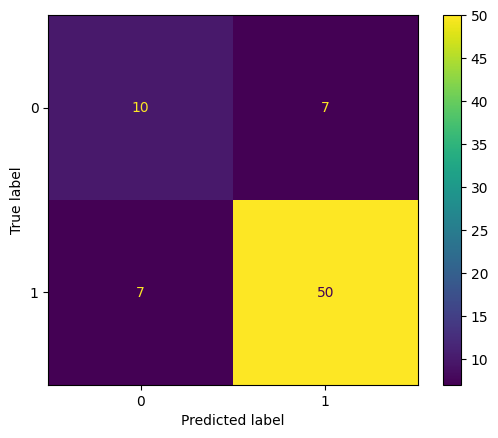

In [84]:
ConfusionMatrixDisplay.from_estimator(clf, X_test_log_final, y_test_log)

In [85]:
print(classification_report(y_test_log_final, y_pred_log, target_names=['Not infested', 'Infested']))

              precision    recall  f1-score   support

Not infested       0.59      0.59      0.59        17
    Infested       0.88      0.88      0.88        57

    accuracy                           0.81        74
   macro avg       0.73      0.73      0.73        74
weighted avg       0.81      0.81      0.81        74



Now we want to interpret precision, recall and f1 score of our logistic regression model:

**Precision:** 
Precision is the ratio of correctly predicted positive classes to all items predicted as positive. Therefore it tells us how correct or precise the positive predictions of our model are.

**Recall:**
Recall measures how many of the actual positive cases we were able to correctly predict. It is important if we believe that false negatives are more important than false positives.

**F1-Score:**
F1-Score is a performance metric that takes into account both precision and recall. It is calculated from the harmonic mean of the two metrics.

As we want to analyze whether weevils are effective as natural control agents we don´t want to miss an actual infested plant (false negative). That´s why we  aim to optimize recall.

To further evaluate our logistic regression model, we can visualize the ROC curve (Receiver Operating Characteristic Curve). Previously, we had set the threshold value to 0.5. The ROC curve provides a visual way to observe changes in our model's classification thresholds that affect the model's performance. We plot the rate of true positives against the rate of false positives for all possible thresholds. This allows us to select the classification threshold at which we identify the most true-positive cases. 

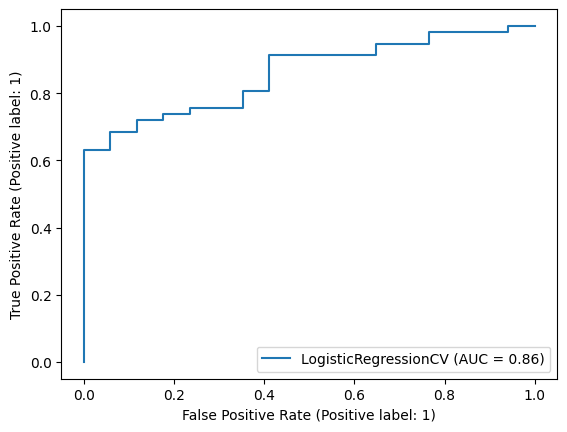

In [86]:
RocCurveDisplay.from_estimator(clf, X_test_log_final, y_test_log_final)

The curve shows that our model performs well, because the higher and closer to the perfect classifier the ROC curve is, the better the model performs.

Next, we can calculate the Area Under the ROC Curve (AUC). It is a performance measure which is independent of the exact classification threshold chosen. AUC is between 0 and 1, with higher numbers indicating better performance so our value indicates that the performance of our logistic regression model is very good.

In [87]:
y_score = clf.predict_proba(X_test_log_final)[:, 1]
roc_auc_score(y_test_log_final, y_score)

0.8575851393188855

##### 5.5.2.1 Overfitting

Earlier we chose the reduced method for our logistic regression model. Therefore, we have less observations in our remaining datset. We recognized that the proportion of infested and not infested plants in our dataset was imbalanced so we use overfitting to compensate the difference between value counts and balance our datset.

In [88]:
df_train_log_final['infested'].value_counts()

y_train_log_final.value_counts()

infested
1    218
0     78
Name: count, dtype: int64

We used random oversampler from imblearn to balance our dataset.

In [89]:
ros = RandomOverSampler(random_state=42)
X_train_log_ros, y_train_log_ros = ros.fit_resample(X_train_log_final, y_train_log_final)

print(f"Oversampled data")
print(y_train_log_ros.value_counts())

Oversampled data
infested
1    218
0    218
Name: count, dtype: int64


In [90]:
clf_ros = LogisticRegressionCV()

              precision    recall  f1-score   support

Not infested       0.47      0.88      0.61        17
    Infested       0.95      0.70      0.81        57

    accuracy                           0.74        74
   macro avg       0.71      0.79      0.71        74
weighted avg       0.84      0.74      0.76        74



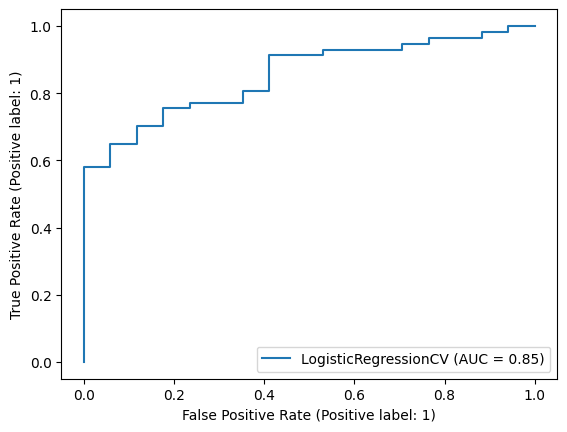

In [91]:
clf_ros.fit(X_train_log_ros, y_train_log_ros)
y_pred_log_ros = clf_ros.predict(X_test_log_final)
print(classification_report(y_test_log_final, y_pred_log_ros, target_names=['Not infested', 'Infested']))
RocCurveDisplay.from_estimator(clf_ros, X_test_log_final, y_test_log_final)

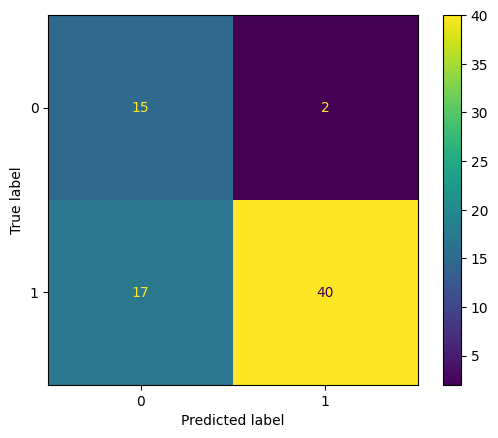

In [92]:
ConfusionMatrixDisplay.from_estimator(clf_ros, X_test_log_final, y_test_log_final)

The confusion matrix shows a higher amount of false negatives compared to the prior confusion matrix without using overfitting.

Unfortunately, overfitting did not lead to significant improvements of our model regarding the AUC value. Also the false negatives are increasing. That´s why we decided to not use overfitting. 

##### 5.5.2.2 Different Tresholds

Next we try to further optimize our logistic regression model by adjusting the decision threshold that we have previously set to 0.5.

In [93]:
thresholds_bal = [0.3, 0.4, 0.5, 0.6, 0.7]

def cls_thresholds(model, threshold, x_test, y_test):
    pred_proba = model.predict_proba(x_test)

    df = pd.DataFrame({"y_pred": pred_proba[:,1] > threshold})

    print(f"Logistic Regression with Threshold {threshold}")

    print(classification_report(y_test, df["y_pred"], target_names=["not infested", "infested"]))


for x in thresholds_bal:
    cls_thresholds(clf, x, X_test_log_final, y_test_log_final)

Logistic Regression with Threshold 0.3
              precision    recall  f1-score   support

not infested       0.60      0.35      0.44        17
    infested       0.83      0.93      0.88        57

    accuracy                           0.80        74
   macro avg       0.71      0.64      0.66        74
weighted avg       0.78      0.80      0.78        74

Logistic Regression with Threshold 0.4
              precision    recall  f1-score   support

not infested       0.67      0.59      0.62        17
    infested       0.88      0.91      0.90        57

    accuracy                           0.84        74
   macro avg       0.77      0.75      0.76        74
weighted avg       0.83      0.84      0.83        74

Logistic Regression with Threshold 0.5
              precision    recall  f1-score   support

not infested       0.59      0.59      0.59        17
    infested       0.88      0.88      0.88        57

    accuracy                           0.81        74
   macro av

For 'Not Infested': Higher recall is better for true negatives. The best recall is at a threshold of 0.7. For 'Infested': Higher recall is better for true positives. The best recall is at a threshold of 0.3. 
Considering this, a threshold of 0.5 seems to be a good compromise, offering a balanced recall for both 'infested' (0.88) and 'not infested' (0.59), with decent precision in both categories. This threshold ensures that both 'infested' and 'not infested' are identified with reasonable accuracy, without skewing too heavily towards one at the expense of the other.

### 5.6 Save model

We save our linear and logistic regression models in the models folder with pickle.

In [94]:
"""
To load the model use:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)
"""

filename_lin = 'reg_model.sav'
pickle.dump(reg, open(f"../models/{filename_lin}", 'wb'))

filename_log = 'log_model.sav'
pickle.dump(clf, open(f"../models/{filename_log}", 'wb'))

filename_log_ros = 'log_model_ros.sav'
pickle.dump(clf_ros, open(f"../models/{filename_log_ros}", 'wb'))

## 6 Conclusions

The study on the release and establishment of the weevil Mecinus janthiniformis for biological control of Dalmatian toadflax in Southern California provides valuable insights into the complex interplay between invasive plant species, biological control agents and the environment. Our hypothesis was that the spread of weevil populations contributes to the reduction of Dalmatian toadflax vegetation in the area and reduces the size of the plants.

Based on our results we recommend increasing the use of herbivorous insects such as Mecinus janthiniformis to control the growth of Dalmatian toadflax. We can confirm that there is a connection between main stem length and infestation at least in the dataset used for our analysis. However, it is still difficult to answerh wether we can proof or not proof our hypothesis. Missing detail information is the main reason for that. We can not be completely sure if the dataset contained all plants or only a sample. Therefore, no concrete statement can be made about the total number of plants in the investigated area and their potential reduction due to the spread of weevil Mecinus janthiniformis populations.

### 6.1 Achievments

After inspecting the data, we noticed that some rows were missing information. Using imputation we successfully addressed this problem. Three different methods have been introduced (reduced, imputed_mean and imputed_median) to find the most suitable approach for each of the two models. For a effective and comprehensible way to select the appropriate features for our model we implemented various functions that automatically output the best fitting features based on forward selection using R² as a measure for linear regression and AUC for logistic regression. For both, linear and logistic regression, we performed an extensive evaluation. We assessed our linear regression model using common metrics such as MSE, RMSE and R². For our logistic regression model we aimed to improve recall. Various options on different decision tresholds have been tested and the final model has been evaluated using ROC and AUC.

### 6.2 Limitations

In the following we want to address the limitations that apply to our model.

Potential improvements through complete data: 

1. During our analysis we quickly recognized that some interesting predictor variables do have a range of misssing values. Although we tried to account for this fact using imputation, a complete data set would likely have led to potential improvements and better model performance.
2. Relation to a specific region: As the data was collected in a specific region in Southern California, the results may only be transferable to other regions to a limited extent. An idea for future work could be to include data from other regions as well.
3. External factors: For the spread and success of weevil Mecinus janthiniformis as natural control agents for the containment of dalamian toadflax, external factors such as weather and environmental influences also play a role, which cannot be planned and integrated into the model.
4. Domain knowledge: It would have been better to have more specific domain knowledge during our analysis. Although the data was accurately described in a dictionary by the data collectors, open issues arose for which we ultimately had to make assumptions. For future work clarification on unclear topics could be useful, e.g. number of total plants vs. samples in our dataset.

### 6.3 Analysis of the Results

#### 6.3.1 Linear Regression

In linear regression, the most appropriate method for dealing with missing values was the imputed_mean method, where the mean value was used to fill in the missing values in the respective columns.

The most powerful predictor variables found with forward selection are:

- stem_diam_bottom_in_cm
- diam_top_in_cm
- total_meja
- tip_of_stem_broken
  
With these variables our model is reaching a moderate performance with an R² value of 0.572. Stem diam bottom is the most influential variable as main stem length and stem diam bottom have the highest correlation.

#### 6.3.2 Logistic Regression

For the logistic regression model, we chose the reduced method as it led to the best results. In this method, all rows with missing values were omitted and therefore a reduced data set was used for the model.

The most powerful predictor variables found with forward selection are:

- main_stem_length_in_cm
- diam_top_in_cm
  
With these variables, our model reaches a AUC score of 0.86. Overfitting or adjusting the decision threshold did not lead to a significant increase in model performance.